In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Q1: What are the causes for shortage of cocoa production in the world?

In [78]:
df = pd.read_csv('cocoa_production_fao.csv') # load csv file into dataframe
print(df.isnull().sum())
print(df.shape)
# Print Datatypes for each column

df.head()

Country or Area        0
Element                0
Year                   2
Unit                   2
Value                  2
Value Footnotes    22949
dtype: int64
(23681, 6)


,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Africa,Gross Production Index Number (2014-2016 = 100),2021.00,Index,115.81,NaN
1,Africa,Gross Production Index Number (2014-2016 = 100),2020.00,Index,122.44,NaN
2,Africa,Gross Production Index Number (2014-2016 = 100),2019.00,Index,114.26,NaN
3,Africa,Gross Production Index Number (2014-2016 = 100),2018.00,Index,114.15,NaN
4,Africa,Gross Production Index Number (2014-2016 = 100),2017.00,Index,112.70,NaN


In [ ]:
# use .info method on dataframe

In [81]:
cleaned = df.iloc[0:-2] # remove footnote from dataframe
cleaned = cleaned.drop(columns=['Value Footnotes']) # drop column
cleaned['Year'] = cleaned['Year'].astype(int) # Replace float year type into integer
cleaned = cleaned.sort_values('Year') # Sort data in ascending year
cleaned = cleaned.dropna(how='all')
print ("Empty rows after cleaning", cleaned.isna().sum())
df

Empty rows after cleaning Country or Area    0
Element            0
Year               0
Unit               0
Value              0
dtype: int64


,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Africa,Gross Production Index Number (2014-2016 = 100),2021.00,Index,115.81,NaN
1,Africa,Gross Production Index Number (2014-2016 = 100),2020.00,Index,122.44,NaN
2,Africa,Gross Production Index Number (2014-2016 = 100),2019.00,Index,114.26,NaN
3,Africa,Gross Production Index Number (2014-2016 = 100),2018.00,Index,114.15,NaN
4,Africa,Gross Production Index Number (2014-2016 = 100),2017.00,Index,112.70,NaN
...,...,...,...,...,...,...
23676,World,Production,1963.00,t,1280491.00,NaN
23677,World,Production,1962.00,t,1213517.00,NaN
23678,World,Production,1961.00,t,1186344.00,NaN
23679,fnSeqID,Footnote,NaN,NaN,NaN,NaN


#
- [ ] Combine all datasets into one dataset, including cocoa production
- [ ] Remove all outliers using iqr
- [ ] Drop unnecessary columns

In [40]:
# Aggregate different statistics into one for each Entry, by Country/Area
agg_df = df.pivot_table(index=['Country or Area', 'Year', 'Unit'],
                        columns='Element',
                        values='Value',
                        aggfunc='first').reset_index()
agg_df

Element,Country or Area,Year,Unit,Area harvested,Gross Production Index Number (2014-2016 = 100),Gross per capita Production Index Number (2014-2016 = 100),Production,Yield
0,Africa,1961,100 g/ha,NaN,NaN,NaN,NaN,2537.00
1,Africa,1961,Index,NaN,25.65,105.78,NaN,NaN
2,Africa,1961,ha,3293200.00,NaN,NaN,NaN,NaN
3,Africa,1961,t,NaN,NaN,NaN,835368.00,NaN
4,Africa,1962,100 g/ha,NaN,NaN,NaN,NaN,2581.00
...,...,...,...,...,...,...,...,...
19019,World,2020,t,NaN,NaN,NaN,5780849.95,NaN
19020,World,2021,100 g/ha,NaN,NaN,NaN,NaN,4837.00
19021,World,2021,Index,NaN,117.87,110.65,NaN,NaN
19022,World,2021,ha,11535884.00,NaN,NaN,NaN,NaN


In [41]:
import pandas as pd

# Assuming your data frame is named 'df'
combined_df = agg_df.groupby(['Country or Area', 'Year'], as_index=False)[
    ['Area harvested', 'Gross Production Index Number (2014-2016 = 100)',
     'Gross per capita Production Index Number (2014-2016 = 100)', 'Production', 'Yield']].sum()


combined_df = combined_df.rename(columns={"Gross Production Index Number (2014-2016 = 100)": "Gross Production Index", "Gross per capita Production Index Number (2014-2016 = 100)":"Gross Production Per Capita Index"})
combined_df

Element,Country or Area,Year,Area harvested,Gross Production Index,Gross Production Per Capita Index,Production,Yield
0,Africa,1961,3293200.00,25.65,105.78,835368.00,2537.00
1,Africa,1962,3359485.00,26.63,107.17,867170.00,2581.00
2,Africa,1963,3393260.00,28.33,111.25,922621.00,2719.00
3,Africa,1964,3444506.00,36.55,139.97,1190061.00,3455.00
4,Africa,1965,3445035.00,26.85,100.27,874245.00,2538.00
...,...,...,...,...,...,...,...
4825,World,2017,11336072.00,108.97,106.47,5159324.63,4551.00
4826,World,2018,11557479.00,114.87,111.00,5438354.21,4705.00
4827,World,2019,11751239.00,116.01,110.93,5492530.34,4674.00
4828,World,2020,12617835.00,122.10,115.63,5780849.95,4581.00


In [53]:
# Lets exclude World so we can focus on continents and countries
filtered = combined_df[combined_df['Country or Area']!='World']

# Lets sort each Entry to a different dataframe, one for each continent and one for each country
import pycountry as pc
by_continent = filtered[filtered['Country or Area'].apply(lambda x: pc.countries.get(name=x) is None)]
by_country = filtered[filtered['Country or Area'].apply(lambda x: pc.countries.get(name=x) is not None)]

by_continent = by_continent.rename(columns={'Country or Area':'Continent'})
by_continent.groupby('Continent').mean()


by_country = by_country.rename(columns={'Country or Area':'Country'})
# filtered

In [54]:
# There seems to be some rows that are not useful to us or does not belong to the cocoa_production_by_continent
to_remove = ['Bolivia (Plurinational State of)', 'Democratic Republic of the Congo','Land Locked Developing Countries','Least Developed Countries', 'Low Income Food Deficit Countries', 'Melanesia', 'Micronesia', 'Micronesia (Federated States of)', 'Net Food Importing Developing Countries', 'Other non-specified areas', 'Polynesia', 'Small Island Developing States', 'United Republic of Tanzania', 'Venezuela (Bolivarian Republic of)', 'Western Africa', 'Eastern Africa']
for value in to_remove:
    by_continent = by_continent[by_continent['Continent']!=value]

    
# we can change scientific notation to float using:
pd.options.display.float_format = '{:.2f}'.format  # Set display format for floats


# After removing those rows, we have
by_continent_grouped = by_continent.groupby('Continent').mean()
# by_continent = by_continent_grouped.drop(columns=['Year'])
by_continent_grouped['Area harvested'] = by_continent_grouped['Area harvested'].astype(float)
by_continent_grouped = by_continent_grouped.drop(columns=['Year'])
by_continent_grouped = by_continent_grouped.reset_index()
print(by_continent_grouped.columns)

Index(['Continent', 'Area harvested', 'Gross Production Index',
       'Gross Production Per Capita Index', 'Production', 'Yield'],
      dtype='object', name='Element')


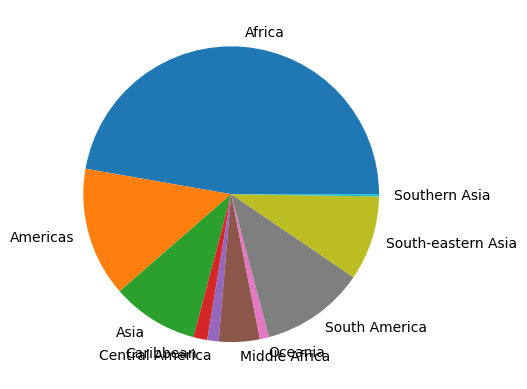

In [55]:
y = by_continent_grouped['Production']
labels = by_continent_grouped['Continent']


plt.pie(y, labels=labels)
plt.show()

Graphs to include:
Histogram
Barchart with Line
BoxPlots

Here we will encode categorical columns using hot level hot encoding:


From this we can discern that roughly half of cocoa production comes from Africa

Let's isolate the countries in Africa that produce the majority of Cocoa

In [56]:
# Assigning continent to each Row
import pycountry_convert as pc
import pandas as pd

# Assuming your DataFrame is named 'df' and the column with country names is 'Country'

def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except Exception as e:
        return 'Unknown'


by_country['Continent'] = by_country['Country'].apply(get_continent)
in_africa = by_country[by_country['Continent']=='Africa']
in_africa

Element,Country,Year,Area harvested,Gross Production Index,Gross Production Per Capita Index,Production,Yield,Continent
122,Angola,1961,1600.00,93.38,482.70,400.00,2500.00,Africa
123,Angola,1962,1600.00,93.38,475.70,400.00,2500.00,Africa
124,Angola,1963,1400.00,70.03,351.78,300.00,2143.00,Africa
125,Angola,1964,1400.00,70.03,347.23,300.00,2143.00,Africa
126,Angola,1965,1400.00,93.38,457.86,400.00,2857.00,Africa
...,...,...,...,...,...,...,...,...
4517,Uganda,2017,74132.00,110.53,103.52,35000.00,4721.00,Africa
4518,Uganda,2018,73108.00,110.53,100.06,35000.00,4787.00,Africa
4519,Uganda,2019,72399.00,110.53,96.72,35000.00,4834.00,Africa
4520,Uganda,2020,71040.00,110.53,93.55,35000.00,4927.00,Africa


/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/fr/9sqjsbl531z9_b7kfds3mlp00000gn/T/ipykernel_12258/2924010955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_africa['Production']=np.log10(in_africa['Production'])


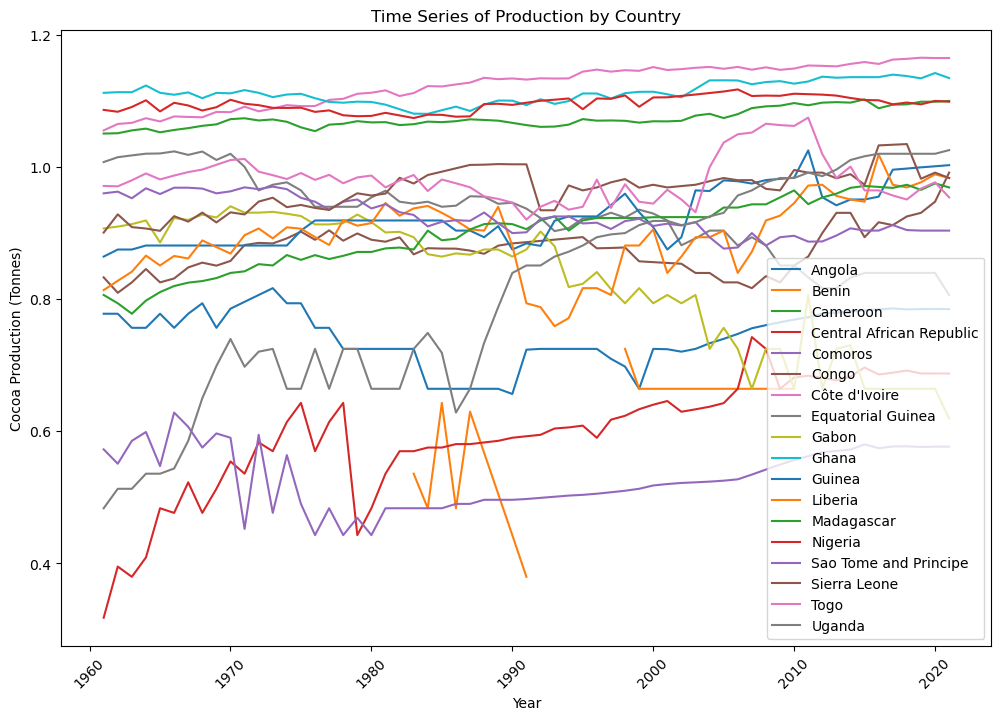

In [143]:
# Plot the line graph
in_africa['Production']=np.log10(in_africa['Production'])
country_groups = in_africa.groupby('Country')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each country's time series
for name, group in country_groups:
    group.plot(x='Year', y='Production', label=name, ax=ax)

# Set the title and labels
ax.set_title('Time Series of Production by Country')
ax.set_xlabel('Year')
ax.set_ylabel('Cocoa Production (Tonnes)')


# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the legend
ax.legend()

plt.show()

ValueError: pie plot doesn't allow negative values

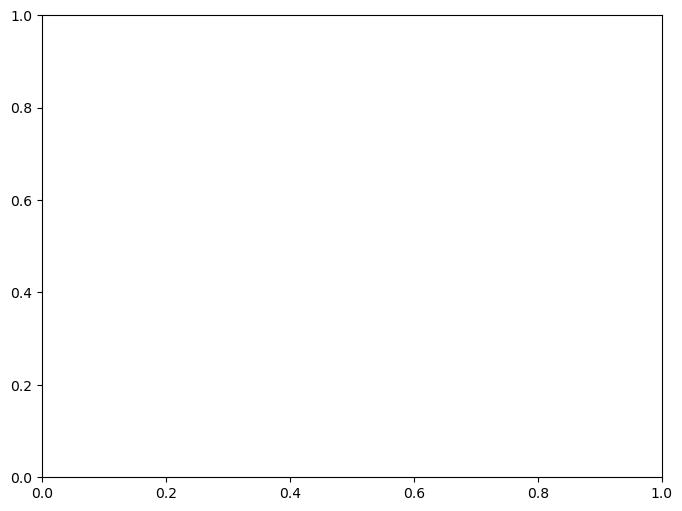

In [144]:
import matplotlib.pyplot as plt

# Group the data by country and sum the production
total_production = in_africa.groupby('Country')['Production'].sum()

# Sort the total production in descending order
sorted_production = total_production.sort_values(ascending=False)


countries_to_show = 4
# Get the top 10 countries
top_10 = sorted_production.head(countries_to_show)

# Get the remaining countries as "Others"
others = sorted_production.tail(len(sorted_production) - countries_to_show).sum()
top_10_df = top_10.to_frame().rename(columns={'Production': 'Total'})
others_df = pd.DataFrame({'Total': [others]}, index=['Others'])
top_10_df = pd.concat([top_10_df, others_df])
top_10 = top_10_df['Total']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the pie chart
top_10.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax)

# Set the title and axis labels
ax.set_title('Total Production by Country (Top 10)')
ax.set_xlabel('')
ax.set_ylabel('')

# Add a legend
ax.legend(labels=top_10.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

It seems that Cote d'lvoire had the highest production of cocoa beans in Africa, followed by Ghana, Nigeria and Cameroon. We will investigate the following countries.

In [59]:
#!pip install geopandas

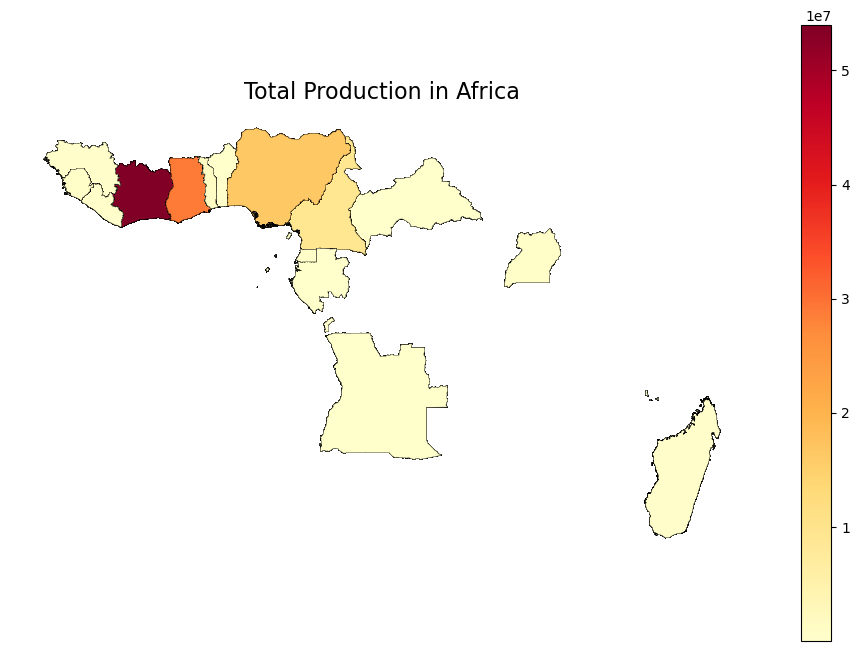

In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the Africa shapefile
africa_shapefile = gpd.read_file("boundary_files/Africa_Boundaries.shp")

# Merge the data with the shapefile
merged = africa_shapefile.merge(in_africa, left_on='NAME_0', right_on='Country', how='left')

# Fill NaN values with 0 for countries not in the dataset
merged['Production'] = merged['Production'].fillna(0)

# Group the data by country and sum the production
total_production = merged.groupby('NAME_0')['Production'].sum().reset_index()

# Rename the columns
total_production.columns = ['Country', 'Total Production']

# Merge the total production data back into the GeoDataFrame
merged = merged.merge(total_production, on='Country', how='left')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth with country borders
merged.plot(column='Total Production', cmap='YlOrRd', ax=ax, legend=True, edgecolor='black', linewidth=0.2)

# Remove the axis
ax.set_axis_off()

# Set the title
ax.set_title('Total Production in Africa', fontsize=16)

# Display the plot
plt.show()

# How does Droughts in Africa affect Cocoa production

In [14]:


files = ['cameroon_asi_annualsummary_season1_data.csv', 'cameroon_mean-vhi_annualsummary_season1_data.csv', 'côte_d\'Ivoire asi_annualsummary_season1_data.csv', 'drought_events.csv', 'ghana_asi_annualsummary_season1_data.csv', 'ghana_mean-vhi_annualsummary_season1_data.csv', 'nigeria_asi_annualsummary_season1_data.csv', 'nigeria_mean_VHI_annualsummary_season1_data.csv']
droughts_path = './droughts/'
# temp = pd.read_csv(droughts_path + 'cameroon_asi_annualsummary_season1_data.csv', encoding='iso-8859-1') # load csv file into dataframe


combined_droughts = pd.DataFrame()
for file in files:
#     print(droughts_path + file)
    file_path = droughts_path + file
 # Load the CSV file into a dataframe
    temp_df = pd.read_csv(file_path, encoding='iso-8859-1')

    # Concatenate the dataframe with the combined dataframe
    combined_droughts = pd.concat([combined_droughts, temp_df], ignore_index=True)
    
    
combined_droughts

,CROP_MASK,COUNTRY,ADM1_CODE,PROVINCE,YEAR,DATA,UNIT,gid,ev_id,iso3disno,...,glide,iso3,id_nat,id_cat,year,start_date,end_date,time_gmt,time_local,duration
0,Cropland,Cameroon,NaN,ALL,2022.00,6.18,VHI % below 35,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cropland,Cameroon,NaN,ALL,2021.00,6.19,VHI % below 35,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cropland,Cameroon,NaN,ALL,2020.00,4.23,VHI % below 35,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cropland,Cameroon,NaN,ALL,2019.00,0.70,VHI % below 35,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cropland,Cameroon,NaN,ALL,2018.00,4.12,VHI % below 35,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29256,Cropland,Nigeria,65706.00,Ondo,1984.00,0.52,Mean VHI[0-1],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29257,Cropland,Nigeria,65707.00,Plateau,1984.00,0.56,Mean VHI[0-1],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29258,Cropland,Nigeria,65708.00,Rivers,1984.00,0.50,Mean VHI[0-1],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29259,Cropland,Nigeria,65709.00,Sokoto,1984.00,0.21,Mean VHI[0-1],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# Cleaning:
# Understand purpose of ADM1_CODE
# Change year to integer
# Remove unit and add it as a column to each row
# Check what gid, ev_id, iso3disno, start_date, end_date... is supposed to do and remove it

# Columns iso3disno, glide, id_cat, time_gmt are empty, so we can remove them
removed_columns = combined_droughts.drop(columns=['iso3disno', 'glide', 'time_gmt','id_cat'])
removed_columns.notna().sum()


CROP_MASK      5265
COUNTRY        5265
ADM1_CODE      4992
PROVINCE       5265
YEAR           5265
DATA           5265
UNIT           5265
gid           23996
ev_id         23996
iso3year      23996
iso3          23995
id_nat        23995
year          23995
start_date    23995
end_date      23995
time_local    23995
duration      23995
dtype: int64

In [116]:
removed_columns[removed_columns['COUNTRY']=='Cameroon'].sort_values('YEAR')

,CROP_MASK,COUNTRY,ADM1_CODE,PROVINCE,YEAR,DATA,UNIT,gid,ev_id,iso3year,iso3,id_nat,year,start_date,end_date,time_local,duration
428,Cropland,Cameroon,824.00,Sud - Ouest,1984.00,0.75,VHI % below 35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,Cropland,Cameroon,816.00,Centre,1984.00,0.11,VHI % below 35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,Cropland,Cameroon,817.00,Est,1984.00,0.00,VHI % below 35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,Cropland,Cameroon,818.00,Extrême - Nord,1984.00,71.25,VHI % below 35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,Cropland,Cameroon,819.00,Littoral,1984.00,0.53,VHI % below 35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Cropland,Cameroon,822.00,Ouest,2022.00,0.50,Mean VHI[0-1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,Cropland,Cameroon,823.00,Sud,2022.00,0.49,Mean VHI[0-1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,Cropland,Cameroon,824.00,Sud - Ouest,2022.00,0.53,Mean VHI[0-1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Cropland,Cameroon,817.00,Est,2022.00,8.17,VHI % below 35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
removed_columns
aggregated = removed_columns.pivot_table(index=['COUNTRY', 'YEAR', 'PROVINCE'],
                        columns='UNIT',
                        values='DATA',
                        aggfunc='first').reset_index()
aggregated.sort_values('YEAR')
aggregated['YEAR']= aggregated['YEAR'].astype(int)
aggregated = aggregated[aggregated['PROVINCE']=='ALL']
aggregated = aggregated.drop(columns=['PROVINCE'])
aggregated = aggregated.rename(columns={'Mean VHI[0-1]':'MEAN VHI' })
aggregated

UNIT,COUNTRY,YEAR,MEAN VHI,VHI % below 35
0,Cameroon,1984,0.44,22.88
11,Cameroon,1985,0.43,11.76
22,Cameroon,1986,0.45,6.37
33,Cameroon,1987,0.42,17.67
44,Cameroon,1988,0.53,0.31
...,...,...,...,...
2735,Nigeria,2018,0.55,6.53
2773,Nigeria,2019,0.54,6.32
2811,Nigeria,2020,0.56,9.42
2849,Nigeria,2021,0.49,19.45


In [118]:

by_country.columns = by_country.columns.str.upper()

merged = pd.merge(aggregated, by_country, on=['COUNTRY', 'YEAR'], how='outer')
merged

,COUNTRY,YEAR,MEAN VHI,VHI % below 35,AREA HARVESTED,GROSS PRODUCTION INDEX,GROSS PRODUCTION PER CAPITA INDEX,PRODUCTION,YIELD,CONTINENT
0,Cameroon,1984,0.44,22.88,420000.00,45.90,110.74,120894.00,2878.00,Africa
1,Cameroon,1985,0.43,11.76,426120.00,44.92,105.12,118320.00,2777.00,Africa
2,Cameroon,1986,0.45,6.37,410000.00,46.73,106.02,123090.00,3002.00,Africa
3,Cameroon,1987,0.42,17.67,440000.00,50.42,110.86,132800.00,3018.00,Africa
4,Cameroon,1988,0.53,0.31,420000.00,49.13,104.75,129400.00,3081.00,Africa
...,...,...,...,...,...,...,...,...,...,...
3290,Vanuatu,2020,NaN,NaN,1433.00,43.18,38.35,745.00,5200.00,Oceania
3291,Vanuatu,2021,NaN,NaN,2854.00,86.07,74.66,1485.00,5203.00,Oceania
3292,Viet Nam,2019,NaN,NaN,6200.00,0.00,0.00,3000.00,4839.00,Asia
3293,Viet Nam,2020,NaN,NaN,4200.00,0.00,0.00,2000.00,4762.00,Asia


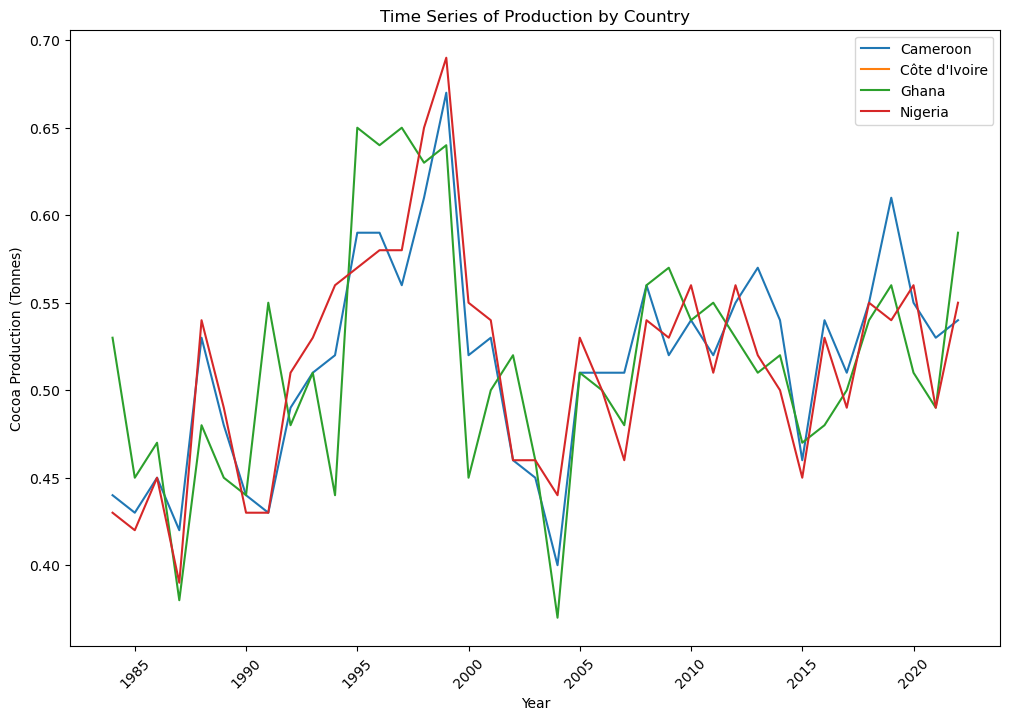

In [119]:
# Plot the line graph
country_groups = aggregated.groupby('COUNTRY')

# # Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# # Plot each country's time series
for name, group in country_groups:
    group.plot(x='YEAR', y='MEAN VHI', label=name, ax=ax)

# Set the title and labels
ax.set_title('Time Series of Production by Country')
ax.set_xlabel('Year')
ax.set_ylabel('Cocoa Production (Tonnes)')


# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the legend
ax.legend()

plt.show()

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


scaler = StandardScaler()
scaled = merged

# Load the original unprocessed data to fit the scaler and retrieve mean and std
# scaled['PRODUCTION_SCALED']=zxscaler.fit_transform(scaled[['PRODUCTION']])

def normalize_numeric_columns(dataframe):
    numeric_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    dataframe[numeric_cols] = scaler.fit_transform(dataframe[numeric_cols])
    return dataframe

scaled = normalize_numeric_columns(scaled)

scaled


,COUNTRY,YEAR,MEAN VHI,VHI % below 35,AREA HARVESTED,GROSS PRODUCTION INDEX,GROSS PRODUCTION PER CAPITA INDEX,PRODUCTION,YIELD,CONTINENT,PRODUCTION_SCALED
0,Cameroon,-0.43,-1.21,1.92,0.80,-0.25,-0.21,1.55,-0.28,Africa,0.39
1,Cameroon,-0.37,-1.37,0.60,0.81,-0.25,-0.21,1.53,-0.31,Africa,0.37
2,Cameroon,-0.31,-1.05,-0.03,0.77,-0.25,-0.21,1.57,-0.25,Africa,0.40
3,Cameroon,-0.26,-1.53,1.30,0.85,-0.24,-0.20,1.65,-0.25,Africa,0.45
4,Cameroon,-0.20,0.23,-0.75,0.80,-0.24,-0.21,1.62,-0.23,Africa,0.43
...,...,...,...,...,...,...,...,...,...,...,...
3290,Vanuatu,1.62,NaN,NaN,-0.33,-0.25,-0.25,-0.50,0.36,Oceania,-0.29
3291,Vanuatu,1.68,NaN,NaN,-0.32,-0.20,-0.23,-0.48,0.36,Oceania,-0.28
3292,Viet Nam,1.57,NaN,NaN,-0.31,-0.30,-0.27,-0.43,0.26,Asia,-0.28
3293,Viet Nam,1.62,NaN,NaN,-0.32,-0.30,-0.27,-0.46,0.24,Asia,-0.28


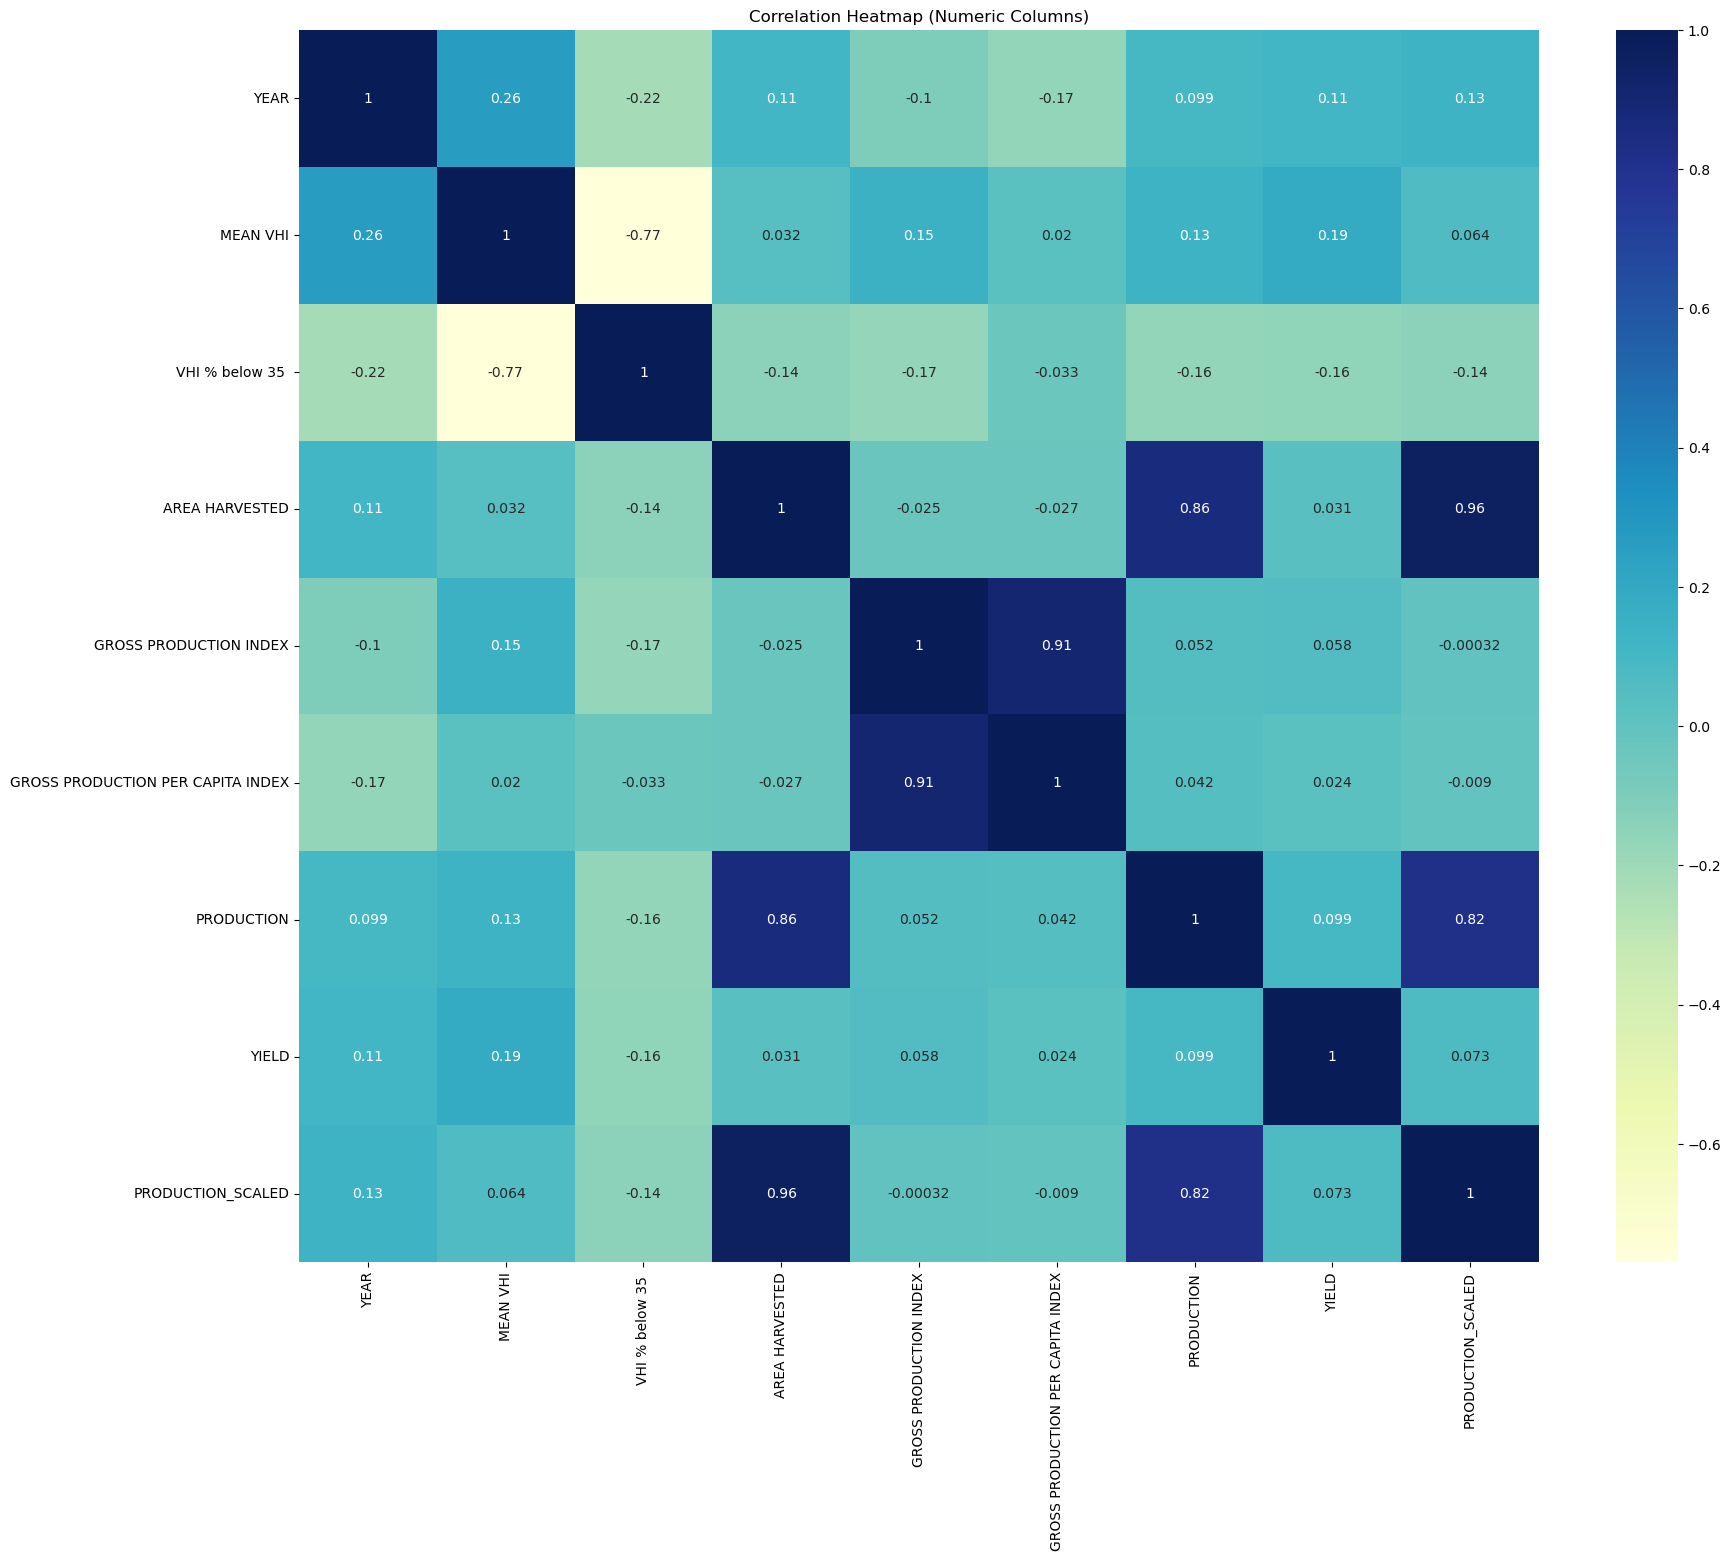

In [141]:
# Measure correlation between variables that indicate droughts and cocoa production

# Select only the numeric columns
numeric_data = merged.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap (Numeric Columns)')

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()

According to [Hategekimana](https://www.researchgate.net/profile/Yves-Hategekimana):
- VHI < 10 classifies as extreme drought
- 10-20 classifies as severe drought
- 20-30 classifies as moderate drought
- 30-40 classifies as mild drought
- \> 40 classifies as no drought
There fore ill classify each year entry for each country by their drought levels for that year, extreme, severe, moderate, mild or none 

In [122]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix


# scaler = StandardScaler()

# # Load the original unprocessed data to fit the scaler and retrieve mean and std
# df_original = pd.read_csv('Airbnb_Open_Data.csv', low_memory=False)
# scaler.fit(df_original[['number of reviews']])

# # Retrieve the mean and standard deviation
# mean = scaler.mean_[0]
# std = scaler.scale_[0]

# print(f"Mean: {mean}, Standard Deviation: {std}")

# # Manually inverse the scaled values using the retrieved mean and standard deviation
# df['Inverse Reviews'] = (df['number of reviews'] * std) + mean

# # Display the first few rows to check the scaling and inverse scaling
# print(df[['number of reviews', 'Inverse Reviews']].head())


# # Calculate the percentiles for binning
# low_percentile = df['Inverse Reviews'].quantile(0.33)
# high_percentile = df['Inverse Reviews'].quantile(0.66)

# # Define the target variable (popularity) based on the calculated percentiles
# df['popularity'] = pd.cut(df['Inverse Reviews'], bins=[-float('inf'), low_percentile, high_percentile, float('inf')], labels=['low', 'medium', 'high'])

# # Drop the 'number of reviews' column as it's now part of the target variable
# df.drop(columns=['number of reviews'], inplace=True)

# # Drop the 'Inverse Reviews' column as it was for verification
# df.drop(columns=['Inverse Reviews'], inplace=True)

# # Split the data into features (X) and target (y)
# X = df.drop(columns=['popularity'])
# y = df['popularity']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and fit the multinomial logistic regression model
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
# model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))


In [ ]:
# Consolidate all data into one table